In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\1410012201_databaseLoadingData (1).csv")

In [128]:
df

,Year,Province,Reason of absence,Sex,Thousand Hours
0,2017,Newfoundland and Labrador,Employees away full week,Males,382.1
1,2018,Newfoundland and Labrador,Employees away full week,Males,434.2
2,2019,Newfoundland and Labrador,Employees away full week,Males,407.5
3,2020,Newfoundland and Labrador,Employees away full week,Males,544.3
4,2021,Newfoundland and Labrador,Employees away full week,Males,435.5
...,...,...,...,...,...
1675,2018,British Columbia,"Other reasons, away part week",Females,61.8
1676,2019,British Columbia,"Other reasons, away part week",Females,76.7
1677,2020,British Columbia,"Other reasons, away part week",Females,166.3
1678,2021,British Columbia,"Other reasons, away part week",Females,73.9


In [71]:
# Basic statistics
numerical_stats = df[["Year", "Thousand Hours"]].describe()
print(numerical_stats)


              Year  Thousand Hours
count  1680.000000     1538.000000
mean   2019.500000      480.144473
std       1.708334     1227.396459
min    2017.000000        0.200000
25%    2018.000000       10.725000
50%    2019.500000       61.700000
75%    2021.000000      305.150000
max    2022.000000    12861.900000


In [72]:
total_hours_by_province = df.groupby("Province")["Thousand Hours"].sum()
sorted_total_hours = total_hours_by_province.sort_values(ascending=False)
print(sorted_total_hours)


Province
Ontario                      272454.0
Quebec                       183006.0
British Columbia             101116.8
Alberta                       85360.0
Manitoba                      25534.5
Saskatchewan                  23135.8
Nova Scotia                   19343.7
New Brunswick                 14760.4
Newfoundland and Labrador     10852.3
Prince Edward Island           2898.7
Name: Thousand Hours, dtype: float64


In [73]:
gender_distribution = df["Sex"].value_counts()
total_hours_by_gender = df.groupby("Sex")["Thousand Hours"].sum()
print(gender_distribution)
print(total_hours_by_gender)


Males      840
Females    840
Name: Sex, dtype: int64
Sex
Females    416724.7
Males      321737.5
Name: Thousand Hours, dtype: float64


In [74]:
year_total_hours = df.groupby("Year")["Thousand Hours"].sum()
print(year_total_hours)



Year
2017    117018.8
2018    114310.3
2019    124607.3
2020    127077.5
2021    119069.0
2022    136379.3
Name: Thousand Hours, dtype: float64


In [75]:
correlation = df["Year"].corr(df["Thousand Hours"])
print("Correlation:", correlation)


Correlation: 0.020065847176982125


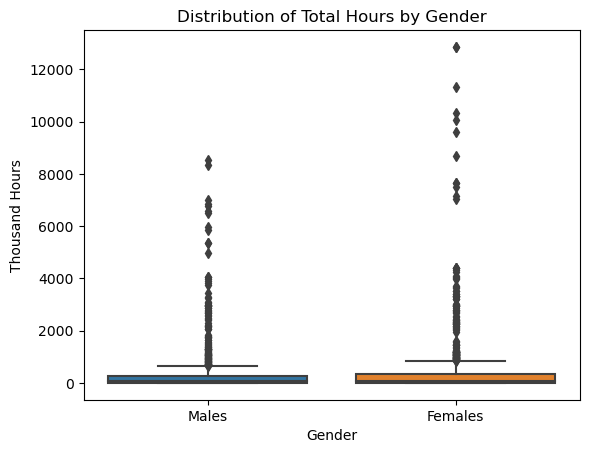

In [129]:
sns.boxplot(x="Sex", y="Thousand Hours", data=df)
plt.xlabel("Gender")
plt.ylabel("Thousand Hours")
plt.title("Distribution of Total Hours by Gender")
plt.show()


In [81]:
mean_hours_by_sex = df.groupby("Sex")["Thousand Hours"].mean()
print(mean_hours_by_sex)

Sex
Females    550.494980
Males      411.955826
Name: Thousand Hours, dtype: float64


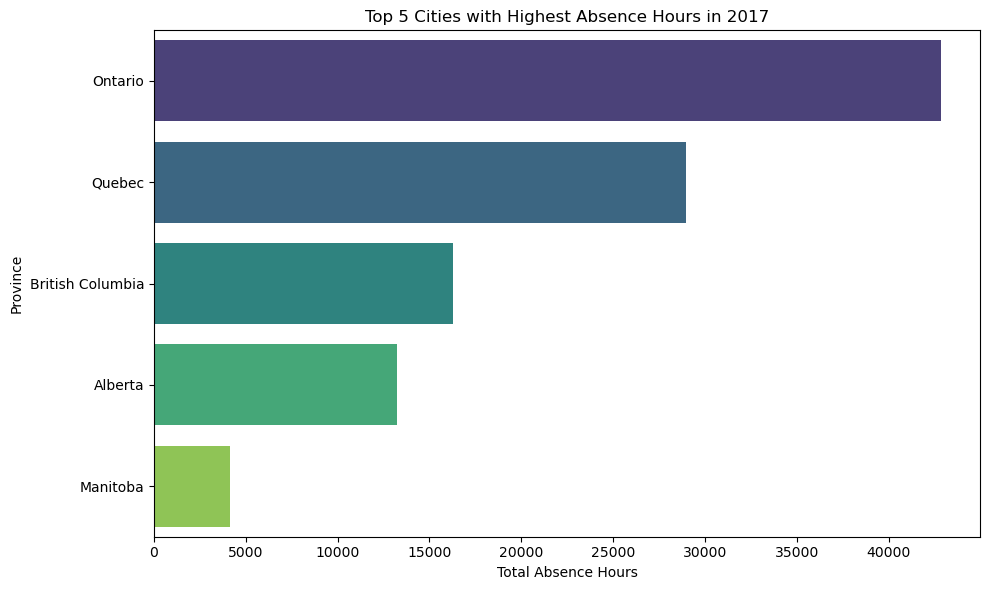

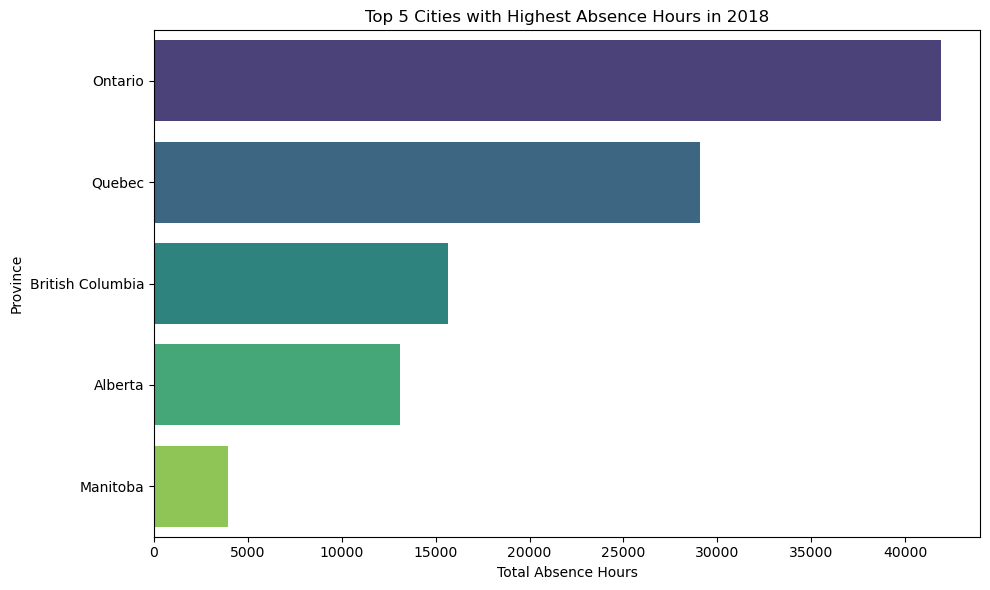

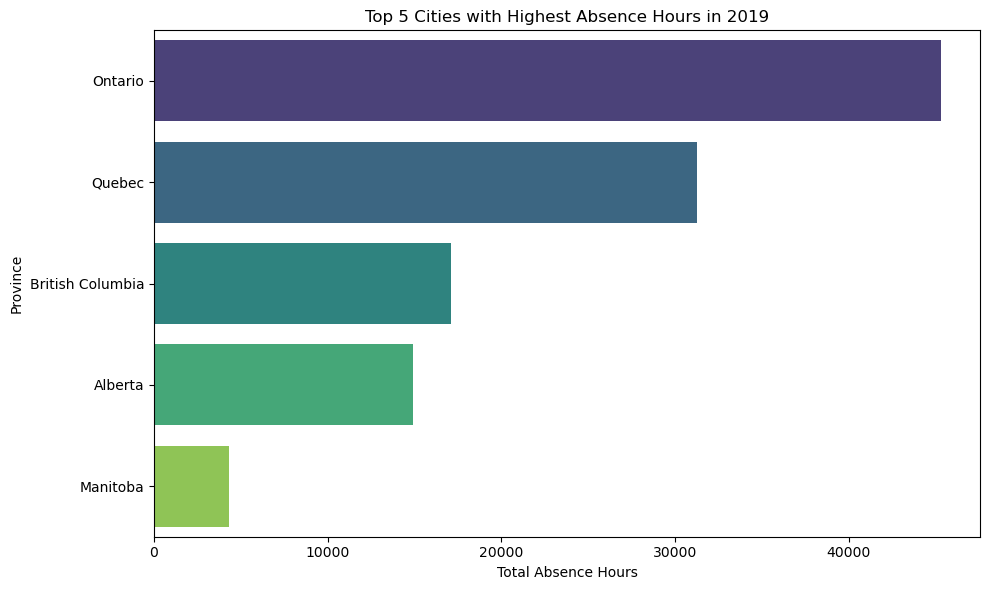

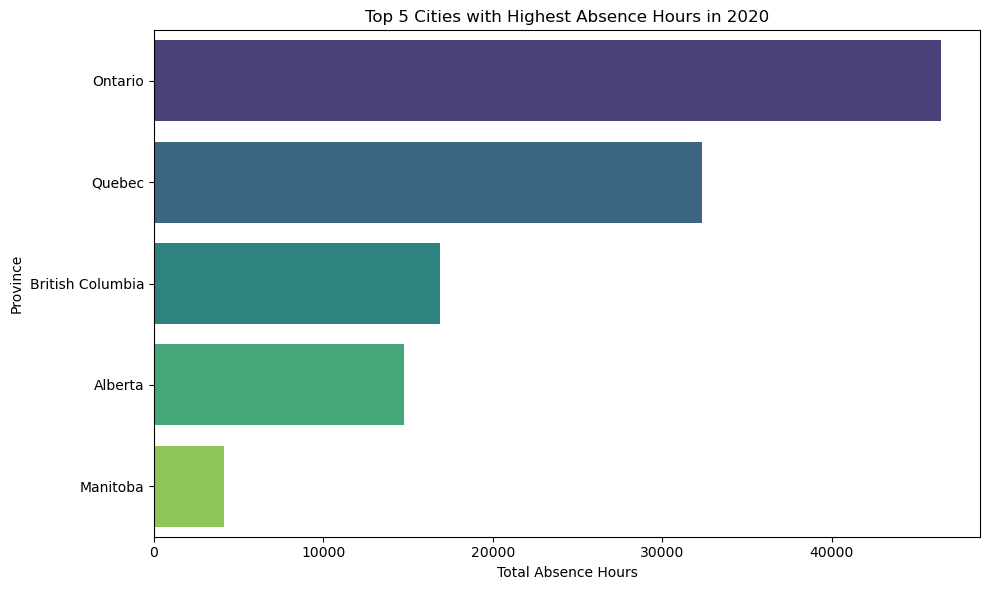

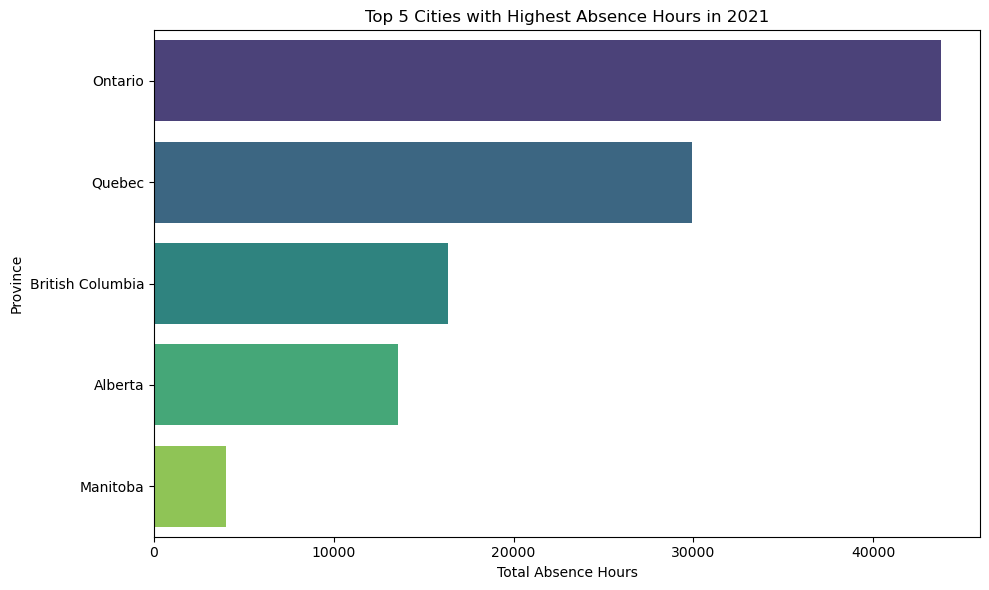

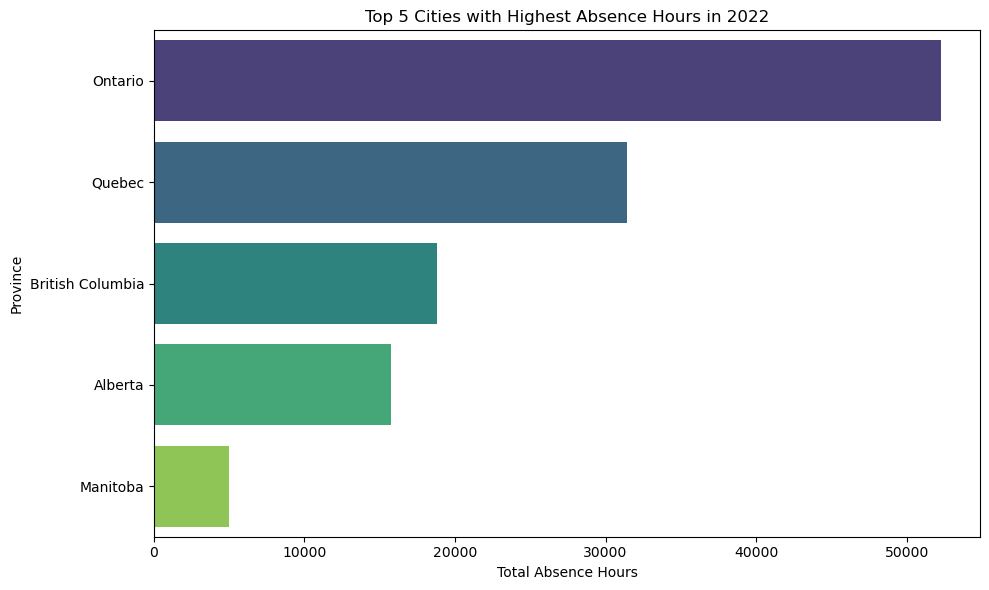

In [132]:
# Top 5 cities in absence rate for each year

top_cities_by_year = df.groupby(["Year", "Province"])["Thousand Hours"].sum().reset_index()
top_cities_by_year = top_cities_by_year.sort_values(by=["Year", "Thousand Hours"], ascending=[True, False])

top_cities_each_year = top_cities_by_year.groupby("Year").head(5)

# Generate visuals for top 5 cities with highest absence hours in each year
for year, data_year in top_cities_each_year.groupby("Year"):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data_year, x="Thousand Hours", y="Province", palette="viridis")
    plt.xlabel("Total Absence Hours")
    plt.ylabel("Province")
    plt.title(f"Top 5 Cities with Highest Absence Hours in {year}")
    plt.tight_layout()
    plt.show()


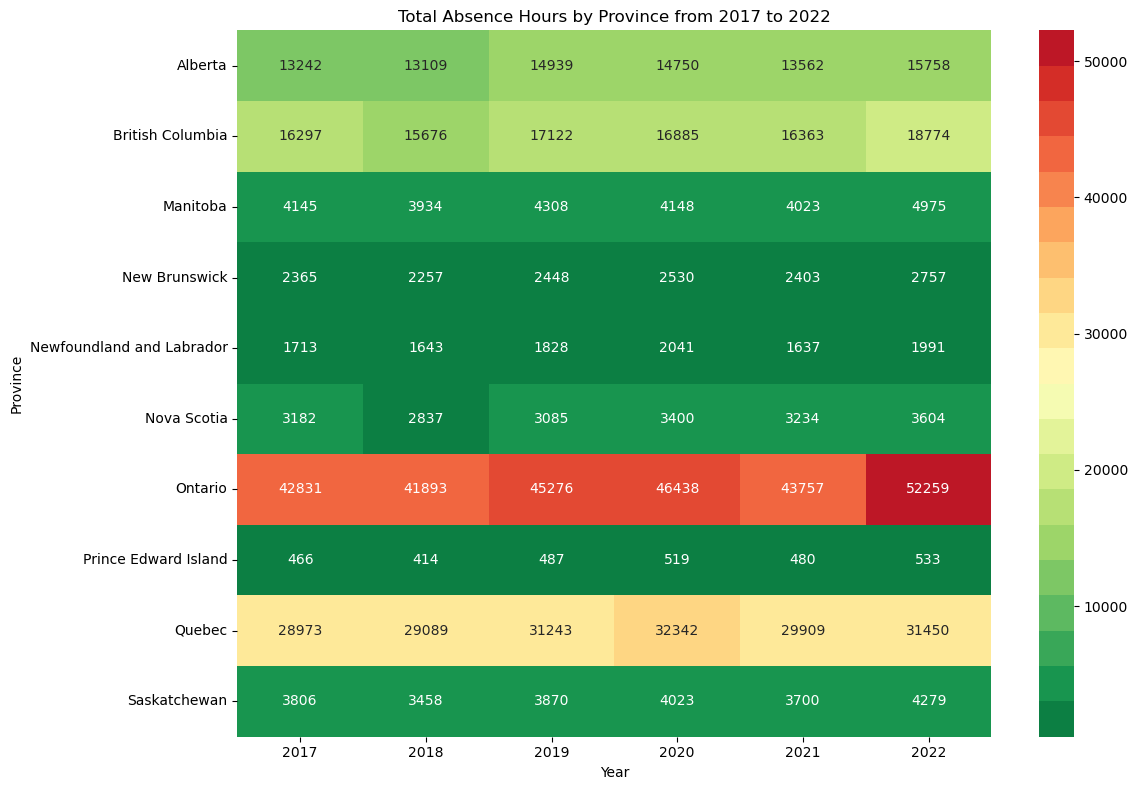

Year                          2017     2018     2019     2020     2021  \
Province                                                                 
Alberta                    13241.7  13109.3  14939.1  14750.3  13562.0   
British Columbia           16296.9  15675.9  17121.8  16885.3  16363.1   
Manitoba                    4144.7   3934.4   4308.5   4148.5   4023.2   
New Brunswick               2364.9   2257.3   2447.7   2530.4   2403.4   
Newfoundland and Labrador   1712.6   1642.6   1828.4   2041.0   1636.8   
Nova Scotia                 3182.4   2837.3   3085.4   3400.3   3234.0   
Ontario                    42831.3  41892.6  45276.0  46437.6  43757.2   
Prince Edward Island         466.0    413.8    487.4    518.7    480.2   
Quebec                     28972.6  29089.0  31243.3  32342.3  29909.2   
Saskatchewan                3805.7   3458.1   3869.7   4023.1   3699.9   

Year                          2022  
Province                            
Alberta                    15757.6  


In [96]:
province_hours_by_year = df.groupby(["Year", "Province"])["Thousand Hours"].sum().reset_index()

# Pivot the data to create a matrix of province hours by year
pivot_table = province_hours_by_year.pivot(index="Province", columns="Year", values="Thousand Hours")

# Define the custom color palette with more steps in green and reversed order
colors = sns.color_palette("RdYlGn_r", n_colors=20)

# Plot province hours year by year with custom color palette
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap=colors, fmt=".0f", annot_kws={"size": 10})
plt.xlabel("Year")
plt.ylabel("Province")
plt.title("Total Absence Hours by Province from 2017 to 2022")
plt.tight_layout()
plt.show()

# Print the pivot table
print(pivot_table)



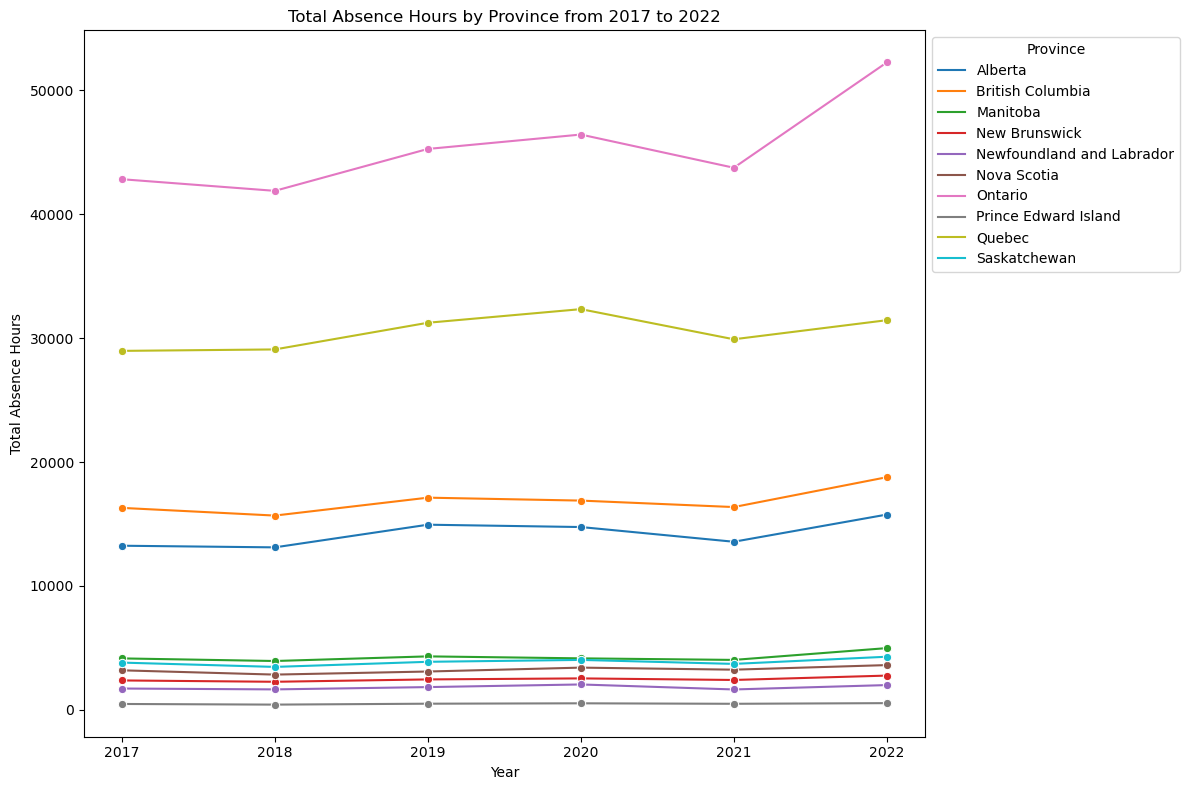

In [99]:

# Group by "Year" and "Province", calculate the sum of "Thousand Hours"
province_hours_by_year = df.groupby(["Year", "Province"])["Thousand Hours"].sum().reset_index()

# Plot line graph for each province year by year
plt.figure(figsize=(12, 8))
sns.lineplot(data=province_hours_by_year, x="Year", y="Thousand Hours", hue="Province", marker="o")
plt.xlabel("Year")
plt.ylabel("Total Absence Hours")
plt.title("Total Absence Hours by Province from 2017 to 2022")
plt.legend(title="Province", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


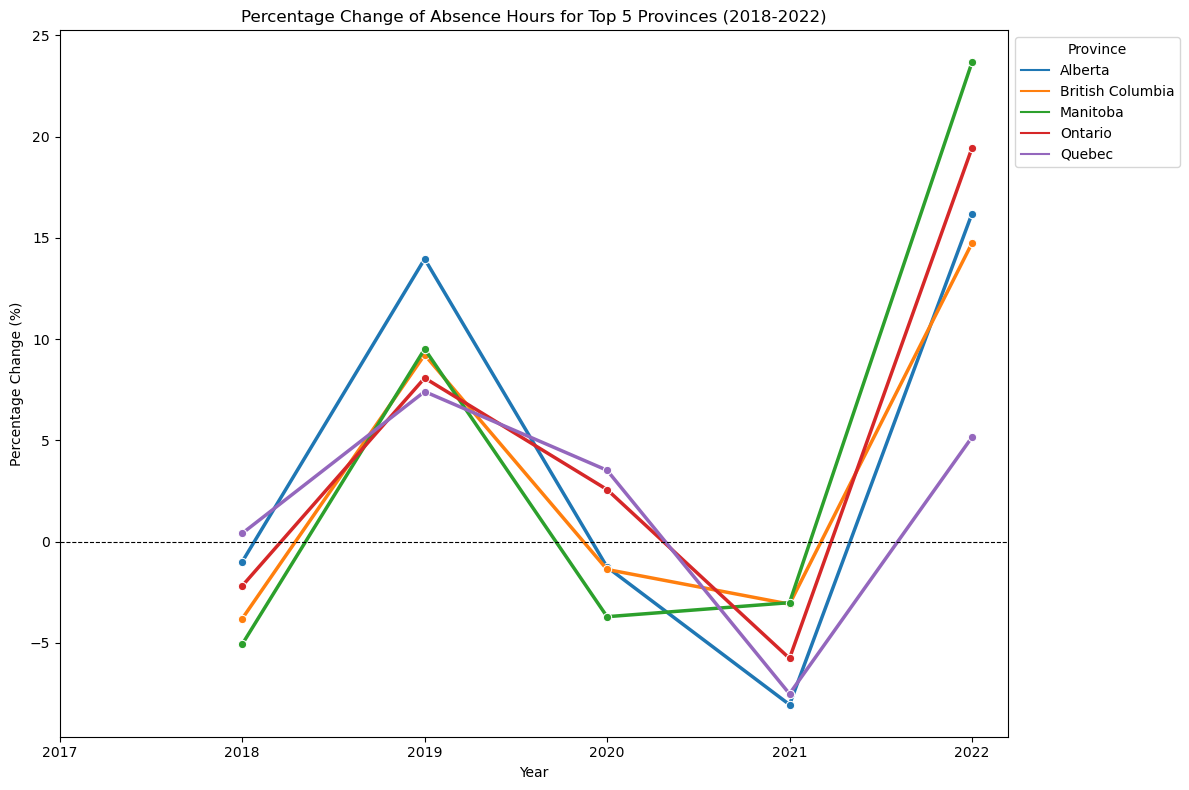

In [102]:
province_hours_by_year = df.groupby(["Year", "Province"])["Thousand Hours"].sum().reset_index()

# Calculate the percentage change from the previous year
province_hours_by_year["Percentage Change"] = province_hours_by_year.groupby("Province")["Thousand Hours"].pct_change() * 100

# Get the top 5 provinces
top_5_provinces = province_hours_by_year.groupby("Province")["Thousand Hours"].sum().nlargest(5).index
filtered_by_top_5 = province_hours_by_year[province_hours_by_year["Province"].isin(top_5_provinces)]

# Plot line graph for percentage change of absence hours year by year for top 5 provinces
plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_by_top_5, x="Year", y="Percentage Change", hue="Province", marker="o", linewidth=2.5)
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.title("Percentage Change of Absence Hours for Top 5 Provinces (2018-2022)")
plt.legend(title="Province", bbox_to_anchor=(1, 1))
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xticks(filtered_by_top_5["Year"].unique())  # Show years without decimals
plt.tight_layout()
plt.show()


<Figure size 1800x800 with 0 Axes>

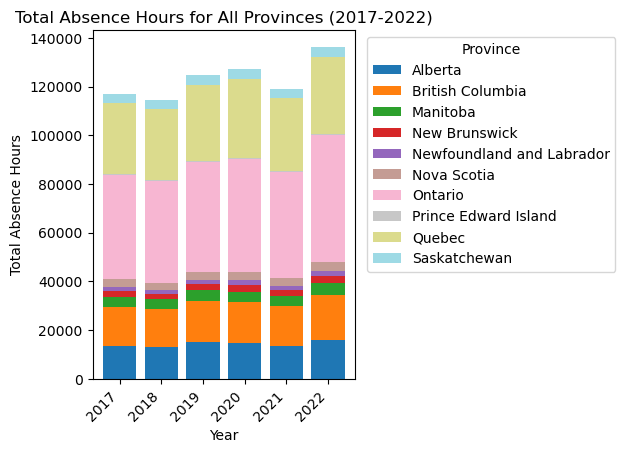

In [115]:


# Group by "Year", "Province", and calculate the sum of "Thousand Hours" for both sexes
province_hours_by_year = df.groupby(["Year", "Province"])["Thousand Hours"].sum().reset_index()

# Pivot the data for stacked bar graph
pivot_table = province_hours_by_year.pivot(index="Year", columns="Province", values="Thousand Hours")

# Plot stacked bar graph for total absence hours year by year for all provinces
plt.figure(figsize=(18, 8))  # Adjust the figsize for wider graph
ax = pivot_table.plot(kind="bar", stacked=True, colormap="tab20", width=0.8)  # Adjust the width of the bars
plt.xlabel("Year")
plt.ylabel("Total Absence Hours")
plt.title("Total Absence Hours for All Provinces (2017-2022)")
plt.legend(title="Province", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")  # Rotate labels and align them to the right
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Increase the bottom margin for x-axis labels
plt.show()


<Figure size 1200x1000 with 0 Axes>

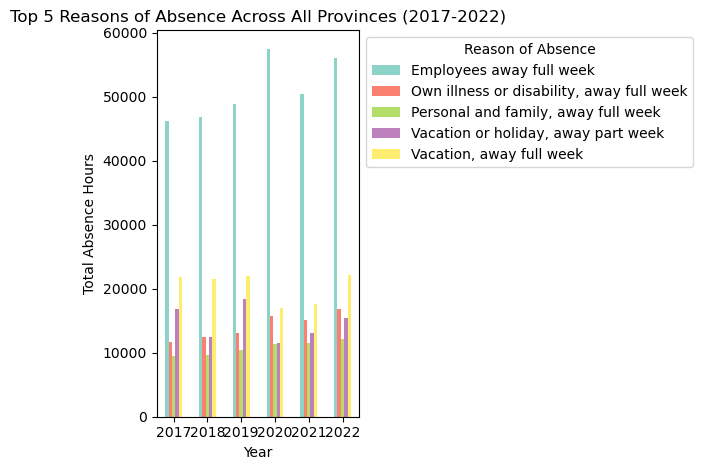

In [125]:

reason_hours_by_year = df.groupby(["Year", "Reason of absence"])["Thousand Hours"].sum().reset_index()

# Get the top 5 reasons of absence for each year
top_reasons_by_year = reason_hours_by_year.groupby("Year").apply(lambda x: x.nlargest(5, "Thousand Hours")).reset_index(drop=True)

# Pivot the data for bar graph
pivot_table = top_reasons_by_year.pivot(index="Year", columns="Reason of absence", values="Thousand Hours")

# Plot vertical bar graph for top 5 reasons of absence year by year
plt.figure(figsize=(12, 10))
pivot_table.plot(kind="bar", stacked=False, colormap="Set3")  # Change colormap to "Set3"
plt.xlabel("Year")
plt.ylabel("Total Absence Hours")
plt.title("Top 5 Reasons of Absence Across All Provinces (2017-2022)")
plt.legend(title="Reason of Absence", bbox_to_anchor=(1, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
